# Assignment_2

## 1.Autoencoder

In [1]:
import os

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"  # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = "7"
    
import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2642451282317079857
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 12610511858932558557
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 6055180812582170178
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 10911298356
locality {
  bus_id: 2
  numa_node: 1
  links {
  }
}
incarnation: 8802390848177190740
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:89:00.0, compute capability: 6.1"
]


In [3]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division
import random
import pandas as pd
import keras
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import fashion_mnist
from keras import backend as K
from keras.callbacks import TensorBoard

from keras.datasets import mnist, cifar10
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten, Reshape
from keras.optimizers import SGD, RMSprop
from keras.utils import np_utils
from keras.regularizers import l2
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D, AveragePooling2D
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [4]:
# The Convolutional autoencoder's from https://blog.keras.io/building-autoencoders-in-keras.html.

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [5]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 8)           0         
__________

In [6]:
# Apply the Fashion MNIST dataset.
import cv2
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline


(x_train, _), (x_test, _) = fashion_mnist.load_data()


x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

n_train = x_train.shape[0]
n_test = x_test.shape[0]
x_train = np.reshape(x_train, (n_train, 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (n_test, 28, 28, 1))  # adapt this if using `channels_first` image data format

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [7]:
# Traing 5 epochs

autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.3688 - val_loss: 0.3379
Epoch 2/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.3243 - val_loss: 0.3241
Epoch 3/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.3155 - val_loss: 0.3171
Epoch 4/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.3102 - val_loss: 0.3120
Epoch 5/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.3057 - val_loss: 0.3048
Epoch 6/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.3027 - val_loss: 0.3039
Epoch 7/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.3011 - val_loss: 0.3034
Epoch 8/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.2994 - val_loss: 0.2964
Epoch 9/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.2973 - val_loss: 0.2996
Epoch

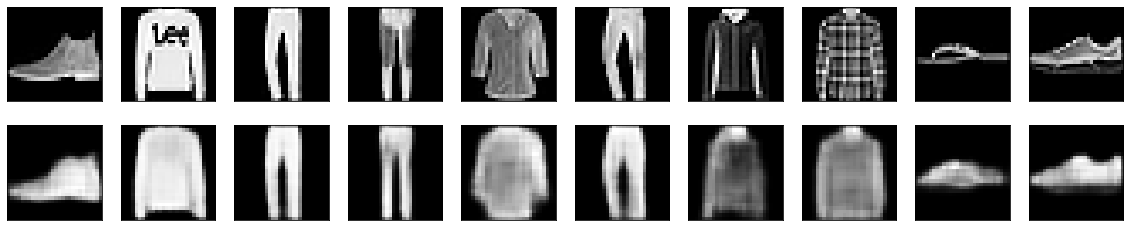

In [8]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 2.Image Classification

Build a deep convolutional network for classification with the Fashion MNIST dataset.

### 2.1 Deep CNN

Taking the deep CNN model on the class. 

The architecture is as follow:
1. A conv2D with 32 filters of kernel size = 3 * 3 and relu active function
2. Max Pooling with pool szie = 2 * 2
3. Another same 1 and 2
4. Drop out layer
5. And another 1.
6. A flatten layer.
7. A dense layer with 84 neurons
8. A dense layer as output layer with 10 neurons
9. Use softmax as the active function of output layer

In [9]:
# =============================
#  Setting up LeNet Architecture
# ============================
model = Sequential()

model.add(Conv2D(filters = 32,kernel_size=(3, 3), 
                 activation='relu', strides=(1, 1), 
                 padding='valid', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters = 32,kernel_size=(3, 3), 
                 activation='relu', strides=(1, 1), 
                 padding='valid', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 32,kernel_size=(3, 3), 
                 activation='relu', strides=(1, 1), 
                 padding='valid', input_shape=(28,28,1)))

model.add(Flatten())
model.add(Dense(84))
model.add(Dense(10))
model.add(Activation('softmax'))

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 3, 3, 32)          9248      
_________________________________________________________________
flatten_1 (Flatten)          (None, 288)               0         
__________

In [11]:
# =============================
#  Reshaping data
# ============================
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [12]:
# =============================
#  Training the model
# ============================
l_rate = 1
sgd = SGD(lr=l_rate, momentum=0.0, decay=0.0, nesterov=False)
# model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy']) -takes a long time to converge
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=20,
          verbose=2, batch_size=64, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 7s - loss: 0.6303 - acc: 0.7683 - val_loss: 0.4373 - val_acc: 0.8438
Epoch 2/20
 - 6s - loss: 0.4346 - acc: 0.8391 - val_loss: 0.3774 - val_acc: 0.8645
Epoch 3/20
 - 6s - loss: 0.3861 - acc: 0.8588 - val_loss: 0.3486 - val_acc: 0.8749
Epoch 4/20
 - 6s - loss: 0.3606 - acc: 0.8664 - val_loss: 0.3267 - val_acc: 0.8846
Epoch 5/20
 - 6s - loss: 0.3414 - acc: 0.8746 - val_loss: 0.3117 - val_acc: 0.8899
Epoch 6/20
 - 6s - loss: 0.3327 - acc: 0.8772 - val_loss: 0.3067 - val_acc: 0.8899
Epoch 7/20
 - 6s - loss: 0.3190 - acc: 0.8815 - val_loss: 0.3042 - val_acc: 0.8882
Epoch 8/20
 - 6s - loss: 0.3139 - acc: 0.8843 - val_loss: 0.2951 - val_acc: 0.8950
Epoch 9/20
 - 6s - loss: 0.3043 - acc: 0.8881 - val_loss: 0.2863 - val_acc: 0.8962
Epoch 10/20
 - 6s - loss: 0.2997 - acc: 0.8889 - val_loss: 0.2832 - val_acc: 0.8964
Epoch 11/20
 - 6s - loss: 0.2930 - acc: 0.8916 - val_loss: 0.2889 - val_acc: 0.8950
Epoch 12/20
 - 6s - loss: 0.2891 - 

In [13]:
print("Test classification rate %0.05f" % model.evaluate(X_test, Y_test)[1])

10000/10000 [==============================] - 1s 59us/step
Test classification rate 0.90280


<Figure size 432x288 with 0 Axes>

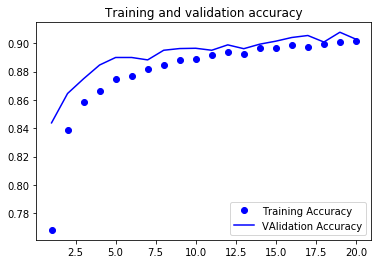

<Figure size 432x288 with 0 Axes>

In [14]:
#-- Plotting the results --
import matplotlib.pyplot as plt

# ~ Plotting parameters ~
# Pulling out :
#   - Training: accuracy and loss
#   - validation: accuracy and loss
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting the data 

# Training + Valdiation Accuracy
epochs = range(1,len(acc) + 1)
plt.plot( epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot( epochs, val_acc, 'b', label = 'VAlidation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

### 2.2 Transfer Learning

In [21]:
# Apply pre-trained model vgg16

from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.optimizers import RMSprop

conv_base = VGG16(weights="imagenet",include_top=False,input_shape=(32,32,3))
vgg_model = Sequential()
vgg_model.add(conv_base)
vgg_model.add(Flatten())
vgg_model.add(Dense(256, activation="relu"))
vgg_model.add(Dense(10, activation="softmax"))

# Compiling the model
vgg_model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

# Model summary
vgg_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_5 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                2570      
Total params: 14,848,586
Trainable params: 14,848,586
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Data pre-processing
import cv2 

X_train = np.asarray([cv2.resize(i, (32,32)) for i in X_train])
X_test = np.asarray([cv2.resize(i, (32,32)) for i in X_test])

X_train = np.asarray([cv2.cvtColor(i, cv2.COLOR_GRAY2BGR) for i in X_train])
X_test = np.asarray([cv2.cvtColor(i, cv2.COLOR_GRAY2BGR) for i in X_test])

print(X_train.shape)
print(X_test.shape)

(60000, 32, 32, 3)
(10000, 32, 32, 3)


In [22]:
history = vgg_model.fit(X_train, Y_train, 
          epochs=20, batch_size=64, validation_data = (X_test, Y_test));

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 33s 553us/step - loss: 0.7384 - acc: 0.7156 - val_loss: 0.3803 - val_acc: 0.8703
Epoch 2/20
60000/60000 [==============================] - 32s 528us/step - loss: 0.3386 - acc: 0.8864 - val_loss: 0.3267 - val_acc: 0.8901
Epoch 3/20
60000/60000 [==============================] - 32s 532us/step - loss: 0.2870 - acc: 0.9032 - val_loss: 0.2961 - val_acc: 0.9034
Epoch 4/20
60000/60000 [==============================] - 32s 529us/step - loss: 0.2554 - acc: 0.9128 - val_loss: 0.2889 - val_acc: 0.9008
Epoch 5/20
60000/60000 [==============================] - 32s 530us/step - loss: 0.2299 - acc: 0.9219 - val_loss: 0.2797 - val_acc: 0.9069
Epoch 6/20
60000/60000 [==============================] - 32s 528us/step - loss: 0.2070 - acc: 0.9293 - val_loss: 0.2400 - val_acc: 0.9205
Epoch 7/20
60000/60000 [==============================] - 32s 532us/step - loss: 0.1974 - acc: 0.9345 - val_loss: 0.

<Figure size 432x288 with 0 Axes>

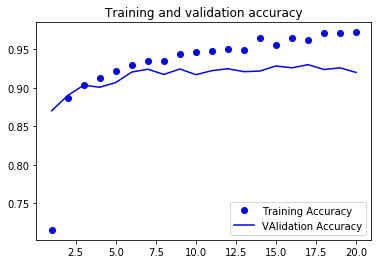

<Figure size 432x288 with 0 Axes>

In [23]:
#-- Plotting the results --
import matplotlib.pyplot as plt

# ~ Plotting parameters ~
# Pulling out :
#   - Training: accuracy and loss
#   - validation: accuracy and loss
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting the data 

# Training + Valdiation Accuracy
epochs = range(1,len(acc) + 1)
plt.plot( epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot( epochs, val_acc, 'b', label = 'VAlidation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

## 3.Text Classification

In [24]:
# Apply dataset

benign = pd.read_csv(
    'https://s3.amazonaws.com/anly-590/url-classification/benign-urls.txt',
    header=None)
benign.columns = ["url"]
benign['label'] = 0 

malicious = pd.read_csv(
    'https://s3.amazonaws.com/anly-590/url-classification/malicious-urls.txt',
    header=None)
malicious.columns = ["url"]
malicious['label'] = 1

urls = pd.concat([benign,malicious])
urls.reset_index(drop=True, inplace=True)

urls.sample(10)

,url,label
2434,.r11---sn-ab5l6nek.googlevideo.com,0
62934,.box493.bluehost.com,0
54010,.free-business.avast.com,0
29186,.git4mjs.southeastasia.cloudapp.azure.com,0
8489,.r1.sn-buu-hp5l.c.pack.google.com,0
30747,.js.live.net,0
51462,.indonesia.westernunion.com,0
4662,.r14---sn-nx57yne7.googlevideo.com,0
22786,.b2bperf2webapp5.parttest.extranettest.microso...,0
65688,.dh7bhroywnjd3.cloudfront.net,0


In [25]:
# Pre-processing and splitting out data into training data set and test data set

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Embedding, SimpleRNN, LSTM, GRU, Flatten, Conv1D, MaxPooling1D, Dropout, Activation, GlobalMaxPooling1D
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

max_features = 256
maxlen = 100
batch_size = 64
Y = list(urls.pop('label'))
X = list(urls['url'])

tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(X)
url_tokens = tokenizer.texts_to_sequences(X)

max_url = max(len(x) for x in url_tokens)
url_tokens = pad_sequences(url_tokens, max_url)

url_tokens = np.asmatrix(url_tokens)

X_train, X_test, Y_train, Y_test = train_test_split(url_tokens, Y, test_size=0.15, random_state=13)

print(X_train.shape)
print(X_train[0])

(57250, 86)
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  1  6 20 20  9  9  9  5 11  9  2 14 16  3  5 11  3 21  1 14
   2  2 14 13  3 18 12 15  3  2  1  4  2  8]]


### 3.1 RNN

Apply simply RNN

In [26]:
# RNN with embedding layer

rnn_model = Sequential()
rnn_model.add(Embedding(max_features, 64, input_length = max_url))
rnn_model.add(SimpleRNN(32))
rnn_model.add(Dense(1, activation ='sigmoid'))

# Compiling the model

rnn_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Model summary

rnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 86, 64)            16384     
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                3104      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 19,521
Trainable params: 19,521
Non-trainable params: 0
_________________________________________________________________


In [28]:
history = rnn_model.fit(X_train, Y_train, 
          epochs=5, batch_size=64, validation_data = (X_test, Y_test));

Train on 57250 samples, validate on 10103 samples
Epoch 1/5
57250/57250 [==============================] - 54s 938us/step - loss: 0.0284 - acc: 0.9873 - val_loss: 0.0235 - val_acc: 0.9890
Epoch 2/5
57250/57250 [==============================] - 53s 929us/step - loss: 0.0240 - acc: 0.9892 - val_loss: 0.0204 - val_acc: 0.9895
Epoch 3/5
57250/57250 [==============================] - 53s 934us/step - loss: 0.0228 - acc: 0.9898 - val_loss: 0.0242 - val_acc: 0.9860
Epoch 4/5
57250/57250 [==============================] - 54s 945us/step - loss: 0.0210 - acc: 0.9901 - val_loss: 0.0207 - val_acc: 0.9903
Epoch 5/5
57250/57250 [==============================] - 53s 922us/step - loss: 0.0205 - acc: 0.9912 - val_loss: 0.0236 - val_acc: 0.9898


<Figure size 432x288 with 0 Axes>

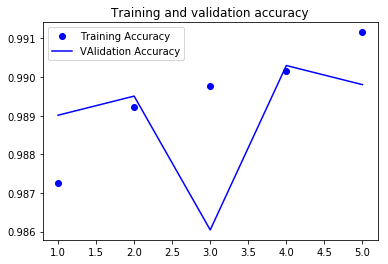

<Figure size 432x288 with 0 Axes>

In [29]:
#-- Plotting the results --
import matplotlib.pyplot as plt

# ~ Plotting parameters ~
# Pulling out :
#   - Training: accuracy and loss
#   - validation: accuracy and loss
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting the data 

# Training + Valdiation Accuracy
epochs = range(1,len(acc) + 1)
plt.plot( epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot( epochs, val_acc, 'b', label = 'VAlidation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

In [30]:
Y_pred_rnn = rnn_model.predict(X_test).ravel()
fpr_rnn, tpr_rnn, thresholds_rnn = roc_curve(Y_test, Y_pred_rnn)
auc_rnn = auc(fpr_rnn, tpr_rnn)

### 3.2 CNN

In [31]:
# CNN with embedding layer

cnn_model = Sequential()
cnn_model.add(Embedding(max_features, 64, input_length = max_url))
cnn_model.add(Dropout(0.2))
cnn_model.add(Conv1D(64, 5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(1, activation='sigmoid'))

# Compiling the model
cnn_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Model summary
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 86, 64)            16384     
_________________________________________________________________
dropout_2 (Dropout)          (None, 86, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 82, 64)            20544     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 65        
Total params: 36,993
Trainable params: 36,993
Non-trainable params: 0
_________________________________________________________________


In [32]:
history = cnn_model.fit(X_train, Y_train, 
          epochs=5, batch_size=64, validation_data = (X_test, Y_test));

Train on 57250 samples, validate on 10103 samples
Epoch 1/5
57250/57250 [==============================] - 5s 92us/step - loss: 0.0655 - acc: 0.9808 - val_loss: 0.0334 - val_acc: 0.9844
Epoch 2/5
57250/57250 [==============================] - 4s 75us/step - loss: 0.0302 - acc: 0.9867 - val_loss: 0.0228 - val_acc: 0.9895
Epoch 3/5
57250/57250 [==============================] - 4s 75us/step - loss: 0.0258 - acc: 0.9886 - val_loss: 0.0352 - val_acc: 0.9853
Epoch 4/5
57250/57250 [==============================] - 4s 76us/step - loss: 0.0245 - acc: 0.9891 - val_loss: 0.0202 - val_acc: 0.9910
Epoch 5/5
57250/57250 [==============================] - 4s 77us/step - loss: 0.0241 - acc: 0.9896 - val_loss: 0.0201 - val_acc: 0.9916


<Figure size 432x288 with 0 Axes>

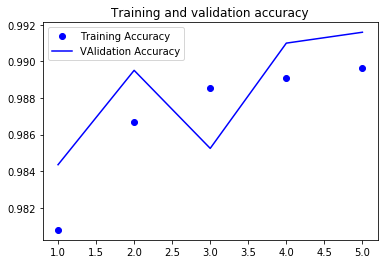

<Figure size 432x288 with 0 Axes>

In [33]:
#-- Plotting the results --
import matplotlib.pyplot as plt

# ~ Plotting parameters ~
# Pulling out :
#   - Training: accuracy and loss
#   - validation: accuracy and loss
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting the data 

# Training + Valdiation Accuracy
epochs = range(1,len(acc) + 1)
plt.plot( epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot( epochs, val_acc, 'b', label = 'VAlidation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

In [34]:
Y_pred_cnn = cnn_model.predict(X_test).ravel()
fpr_cnn, tpr_cnn, thresholds_cnn = roc_curve(Y_test, Y_pred_cnn)
auc_cnn = auc(fpr_cnn, tpr_cnn)

### 3.3 Compare those two model

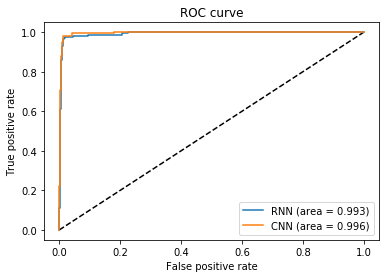

In [35]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rnn, tpr_rnn, label='RNN (area = {:.3f})'.format(auc_rnn))
plt.plot(fpr_cnn, tpr_cnn, label='CNN (area = {:.3f})'.format(auc_cnn))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()